In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
from ruamel.yaml import YAML
import matplotlib.ticker as ticker
from scipy.interpolate import interp1d
from sklearn.preprocessing import StandardScaler
import os
import sys 
sys.path.append("../src")
from Fitness.AED import Calculate_AED



In [2]:
yaml = YAML()
with open("../data/Info_species_fitness.yaml", "r") as f:
    input = yaml.load(f)
Name_Folder = "0D_1case"
main_Path = os.getcwd()
flag_output = True

data_d = pd.read_csv(f"/work/kotlarcm/WORK/Automated_Reduced/{Name_Folder}/Processing_Detailed.csv")
data_r = pd.read_csv(f"/work/kotlarcm/WORK/Automated_Reduced/{Name_Folder}/Processing_Reduced.csv")
data_a = pd.read_csv(f"/work/kotlarcm/WORK/Automated_Reduced/{Name_Folder}/Processing_OPTIM_A.csv")
data_b = pd.read_csv(f"/work/kotlarcm/WORK/Automated_Reduced/{Name_Folder}/Processing_OPTIM_B.csv")

In [3]:
EAD_ML_R_TOT,EAD_ML_R  = Calculate_AED(data_d,data_r,input,main_Path,flag_output) 
EAD_ML_A_TOT,EAD_ML_A  = Calculate_AED(data_d,data_a,input,main_Path,flag_output) 
EAD_ML_B_TOT,EAD_ML_B  = Calculate_AED(data_d,data_b,input,main_Path,flag_output) 


Err AED = 2.26E+05
Err AED = 2.56E+05
Err AED = 1.30E+05


/work/kotlarcm/WORK/Automated_Reduced/.venv/lib/python3.9/site-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/work/kotlarcm/WORK/Automated_Reduced/.venv/lib/python3.9/site-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/work/kotlarcm/WORK/Automated_Reduced/.venv/lib/python3.9/site-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old

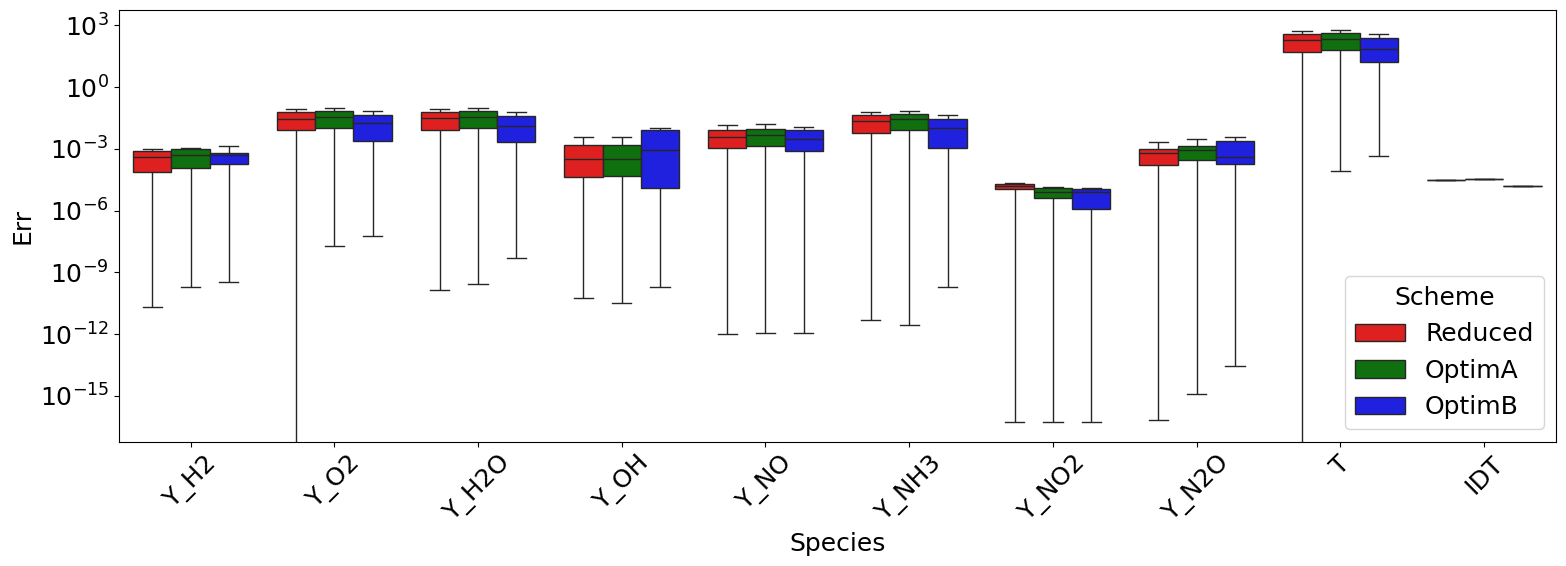

In [4]:
df_reduced = EAD_ML_R.melt(var_name="Species", value_name="Err")
df_reduced["Scheme"] = "Reduced"

df_optimA = EAD_ML_A.melt(var_name="Species", value_name="Err")
df_optimA["Scheme"] = "OptimA"

df_optimB = EAD_ML_B.melt(var_name="Species", value_name="Err")
df_optimB["Scheme"] = "OptimB"

# Fusionner les deux
df_all = pd.concat([df_reduced, df_optimA,df_optimB], ignore_index=True)

palette = {"Reduced": "red", "OptimA": "green","OptimB" : "blue"}

# Tracer
plt.figure(figsize=(16, 6))
plt.rcParams.update({'font.size': 18})
sns.boxplot(data=df_all, x="Species", y="Err", hue="Scheme",  palette=palette,showfliers=False)
plt.yscale("log")
# plt.ylim([1e-1, 1e6])
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("AED_SPECIES.png")

